### Estimation of exchange interactions between spins by baysian method

reference : https://arxiv.org/abs/1701.09063

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
J = np.array([
    1,
    4,
    5,
    6,
    0,
    0,
    0
])

In [3]:
b = 0.1

In [4]:
interactions = np.array([
    [0,    J[0], J[1], J[3], 0,    0,    0,    0,    0,    0,    0,    0,    0],  # spin 1
    [J[0], 0,    J[2], J[0], 0, J[5],    0,    0,    0,    0,    0,    0,    0],  # spin 2
    [J[1], J[2], 0,    J[1], 0, J[4],    0,    0,    0,    0,    0,    0,    0],  # spin 3
    [J[3], J[0], J[1], 0,    J[1], J[0], J[3], 0,    0,    0,    0,    0,    0],  # spin 4
    [0,    0,    J[6], J[2], 0,    J[2], J[1], 0,    J[6], 0,    0,    0,    0],  # spin 5
    [0,    J[5], J[4], J[0], J[2], 0,    J[0], J[5], 0,    0,    0,    0,    0],  # spin 6
    [0,    0,    0,    J[3], J[1], J[0], 0,    J[0], J[1], J[3], 0,    0,    0],  # spin 7
    [0,    0,    0,    0,    0,    J[5], J[0], 0,    J[2], J[0], 0,    J[5], 0],  # spin 8
    [0,    0,    0,    0, J[6],    J[4], J[1], J[2], 0,    J[1], J[6], J[4], 0],  # spin 9
    [0,    0,    0,    0,    0,    0,    J[3], J[0], J[1], 0,    J[1], J[0], J[3]],  # spin 10
    [0,    0,    0,    0,    0,    0,    0,    0,    J[6], J[1], 0,    J[2], J[1]],  # spin 11
    [0,    0,    0,    0,    0,    0,    0,    J[5], J[4], J[0], J[2], 0,    J[0]],  # spin 12
    [0,    0,    0,    0,    0,    0,    0,    0,    0,    J[3], J[1], J[0], 0],  # spin 13
])

In [103]:
def spin_hamiltonian(spins, interactions, b, h=0.0):
    energy = 0.
    for i, s1 in enumerate(spins):
        for j, s2 in enumerate(spins):
            energy += interactions[i][j]*(s1*s2 - b*interactions[i][j]*(s1*s2)**2)
    energy *= 0.5
    for s in spins:
        energy -= h*s
    return energy

In [6]:
spins = np.random.randint(0, 2, 13) - 0.5

In [7]:
spins

array([ 0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5,
       -0.5, -0.5])

In [8]:
spin_hamiltonian(spins, interactions, b, 1.4)

11.053124999999996

In [9]:
print(2**14)

16384


In [10]:
def get_min_energy(interactions, b, h=0.0):
    spins = []
    min_energy = float('inf')
    for s1 in (-0.5, 0.5):
        for s2 in (-0.5, 0.5):
            for s3 in (-0.5, 0.5):
                for s4 in (-0.5, 0.5):
                    for s5 in (-0.5, 0.5):
                        for s6 in (-0.5, 0.5):
                            for s7 in (-0.5, 0.5):
                                for s8 in (-0.5, 0.5):
                                    for s9 in (-0.5, 0.5):
                                        for s10 in (-0.5, 0.5):
                                            for s11 in (-0.5, 0.5):
                                                for s12 in (-0.5, 0.5):
                                                    for s13 in (-0.5, 0.5):
                                                        s = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13]
                                                        energy = spin_hamiltonian(s, interactions, b, h)
                                                        if energy < min_energy:
                                                            spins = s.copy()
                                                            min_energy = energy
    return min_energy, spins

In [11]:
h_hist = []
m_hist = []
for h in range(20):
    min_energy, spins = get_min_energy(interactions, b, h)
    print('h : ', h)
    print('m : ', abs(sum(spins)))
    h_hist.append(h)
    m_hist.append(abs(sum(spins))/(len(spins)*0.5))

h :  0
m :  0.5
h :  1
m :  0.5
h :  2
m :  0.5
h :  3
m :  4.5
h :  4
m :  4.5
h :  5
m :  4.5
h :  6
m :  4.5
h :  7
m :  4.5
h :  8
m :  4.5
h :  9
m :  4.5
h :  10
m :  4.5
h :  11
m :  4.5
h :  12
m :  6.5
h :  13
m :  6.5
h :  14
m :  6.5
h :  15
m :  6.5
h :  16
m :  6.5
h :  17
m :  6.5
h :  18
m :  6.5
h :  19
m :  6.5


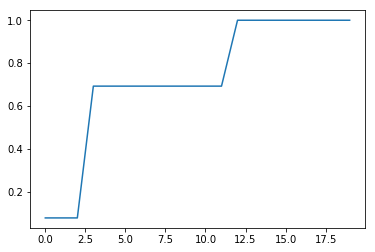

In [12]:
plt.plot(h_hist, m_hist)

In [93]:
# {スピン種類番号: {相互作用するスピンの相対位置: 相互作用}}
interactions = {
    0: {-3: J[3], -2: J[1], -1: J[0], 1: J[0], 2: J[1], 3: J[3]},
    1: {-3: J[4], -2: J[5], -1: J[0], 1: J[2], 2: J[0], 4: J[5]},
    2: {-4: J[6], -3: J[4], -2: J[1], -1: J[2], 1: J[1], 2: J[6], 3: J[4]},
    3: {-3: J[3], -2: J[0], -1: J[1], 1: J[1], 2: J[0], 3: J[3]},
    4: {-3: J[4], -2: J[6], -1: J[1], 1: J[2], 2: J[1], 3: J[4], 4: J[6]},
    5: {-4: J[5], -3: J[4], -2: J[0], -1: J[2], 1: J[0], 2: J[5], 3: J[4]}
}

In [94]:
interactions[1]

{-3: 0, -2: 0, -1: 1, 1: 5, 2: 1, 4: 0}

In [53]:
N_SPIN = 100

In [54]:
spins = np.random.randint(0, 2, N_SPIN) - 0.5

In [55]:
spins

array([-0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5,  0.5,  0.5, -0.5,
        0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,
       -0.5,  0.5, -0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5, -0.5,  0.5,
        0.5,  0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5,
       -0.5,  0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5,  0.5,  0.5,
        0.5, -0.5,  0.5, -0.5,  0.5,  0.5, -0.5,  0.5,  0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5,
        0.5])

In [104]:
def spin_hamiltonian(spins, interactions, b, h=0.0):
    energy = 0.
    for i, s1 in enumerate(spins):
        spin_no = i %  6
        for relative_no, interaction in interactions[spin_no].items():
            s2 = spins[(i+relative_no)%N_SPIN]
            energy += interaction*(s1*s2 - b*interaction*(s1*s2)**2)
    energy *= 0.5

    for s in spins:
        energy -= h*s
    return energy

In [105]:
spin_hamiltonian(spins, interactions, b, h=100.0)

-3029.675

In [99]:
N_FLIP = 1000

In [67]:
%%time
rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for idx in rand_idxs:
    cur_energy = spin_hamiltonian(spins, interactions, b, h=10.0)
    spins[idx] *= -1.
    flip_energy = spin_hamiltonian(spins, interactions, b, h=10.0)
    if 0.01 > np.random.rand():
        pass
    elif flip_energy > cur_energy:
        spins[idx] *= -1.

Wall time: 7.82 s


In [68]:
print(sum(spins))

49.0


In [71]:
%%time
h_hist = []
m_hist = []
for h in np.linspace(0, 20, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)
            if 0.01 > np.random.rand():
                pass
            elif flip_energy > cur_energy:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.02
h :  0.12578616352201258
m :  0.02
h :  0.25157232704402516
m :  0.013333333333333334
h :  0.37735849056603776
m :  0.02
h :  0.5031446540880503
m :  0.02666666666666667
h :  0.6289308176100629
m :  0.02666666666666667
h :  0.7547169811320755
m :  0.02666666666666667
h :  0.8805031446540881
m :  0.006666666666666667
h :  1.0062893081761006
m :  0.04
h :  1.1320754716981132
m :  0.02666666666666667
h :  1.2578616352201257
m :  0.02
h :  1.3836477987421383
m :  0.03333333333333333
h :  1.509433962264151
m :  0.20000000000000004
h :  1.6352201257861636
m :  0.20000000000000004
h :  1.7610062893081762
m :  0.17333333333333334
h :  1.8867924528301887
m :  0.22666666666666666
h :  2.0125786163522013
m :  0.19333333333333336
h :  2.138364779874214
m :  0.2333333333333333
h :  2.2641509433962264
m :  0.22
h :  2.389937106918239
m :  0.20000000000000004
h :  2.5157232704402515
m :  0.3333333333333333
h :  2.641509433962264
m :  0.32666666666666666
h :  2.7672955974842766
m : 

KeyboardInterrupt: 

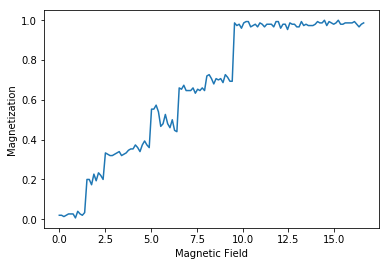

In [72]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [85]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.0
h :  0.20125786163522014
m :  0.013333333333333334
h :  0.30188679245283023
m :  0.013333333333333334
h :  0.4025157232704403
m :  0.02666666666666667
h :  0.5031446540880503
m :  0.013333333333333334
h :  0.6037735849056605
m :  0.02666666666666667
h :  0.7044025157232705
m :  0.02
h :  0.8050314465408805
m :  0.02666666666666667
h :  0.9056603773584906
m :  0.04666666666666667
h :  1.0062893081761006
m :  0.03333333333333333
h :  1.1069182389937107
m :  0.05333333333333334
h :  1.207547169811321
m :  0.08666666666666667
h :  1.308176100628931
m :  0.06666666666666667
h :  1.408805031446541
m :  0.04666666666666667
h :  1.509433962264151
m :  0.17333333333333334
h :  1.610062893081761
m :  0.1466666666666667
h :  1.7106918238993711
m :  0.12666666666666668
h :  1.8113207547169812
m :  0.12
h :  1.9119496855345912
m :  0.12
h :  2.0125786163522013
m :  0.09333333333333334
h :  2.1132075471698113
m :  0.086666666666666

KeyboardInterrupt: 

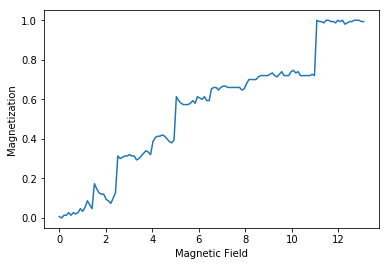

In [86]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [ ]:
# ↓相互作用とハミルトニアンが間違っていた

In [88]:
N_FLIP = 10000

In [89]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.04
h :  0.20125786163522014
m :  0.02
h :  0.30188679245283023
m :  0.04666666666666667
h :  0.4025157232704403
m :  0.03333333333333333
h :  0.5031446540880503
m :  0.04
h :  0.6037735849056605
m :  0.04666666666666667
h :  0.7044025157232705
m :  0.05333333333333334
h :  0.8050314465408805
m :  0.04
h :  0.9056603773584906
m :  0.04
h :  1.0062893081761006
m :  0.006666666666666667
h :  1.1069182389937107
m :  0.02666666666666667
h :  1.207547169811321
m :  0.02666666666666667
h :  1.308176100628931
m :  0.04
h :  1.408805031446541
m :  0.03333333333333333
h :  1.509433962264151
m :  0.18666666666666668
h :  1.610062893081761
m :  0.1466666666666667
h :  1.7106918238993711
m :  0.16666666666666666
h :  1.8113207547169812
m :  0.18666666666666668
h :  1.9119496855345912
m :  0.18666666666666668
h :  2.0125786163522013
m :  0.13333333333333333
h :  2.1132075471698113
m :  0.10000000000000002
h :  2.2138364779874213
m : 

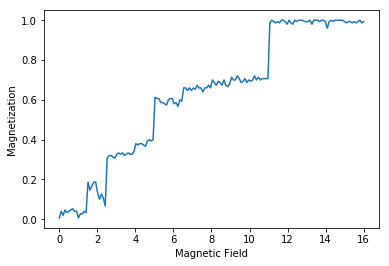

In [90]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [106]:
N_FLIP = 1000


In [107]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.02666666666666667
h :  0.20125786163522014
m :  0.013333333333333334
h :  0.30188679245283023
m :  0.013333333333333334
h :  0.4025157232704403
m :  0.02
h :  0.5031446540880503
m :  0.02
h :  0.6037735849056605
m :  0.013333333333333334
h :  0.7044025157232705
m :  0.02
h :  0.8050314465408805
m :  0.02666666666666667
h :  0.9056603773584906
m :  0.03333333333333333
h :  1.0062893081761006
m :  0.05333333333333334
h :  1.1069182389937107
m :  0.05333333333333334
h :  1.207547169811321
m :  0.04666666666666667
h :  1.308176100628931
m :  0.04
h :  1.408805031446541
m :  0.04
h :  1.509433962264151
m :  0.04
h :  1.610062893081761
m :  0.04
h :  1.7106918238993711
m :  0.03333333333333333
h :  1.8113207547169812
m :  0.04666666666666667
h :  1.9119496855345912
m :  0.04666666666666667
h :  2.0125786163522013
m :  0.04
h :  2.1132075471698113
m :  0.04
h :  2.2138364779874213
m :  0.06
h :  2.3144654088050314
m :  0.06
h 

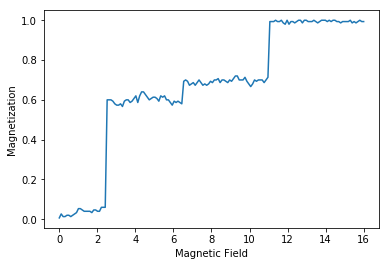

In [108]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [111]:
%%time

T = 10

h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if min(1.0, np.exp(-(flip_energy-cur_energy)/T)) > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.08
h :  0.10062893081761007
m :  0.05333333333333332
h :  0.20125786163522014
m :  0.08666666666666667
h :  0.30188679245283023
m :  0.09333333333333334
h :  0.4025157232704403
m :  0.02
h :  0.5031446540880503
m :  0.08
h :  0.6037735849056605
m :  0.06666666666666667
h :  0.7044025157232705
m :  0.04666666666666666
h :  0.8050314465408805
m :  0.06
h :  0.9056603773584906
m :  0.09333333333333334
h :  1.0062893081761006
m :  0.05333333333333334
h :  1.1069182389937107
m :  0.07333333333333333
h :  1.207547169811321
m :  0.08666666666666667
h :  1.308176100628931
m :  0.06666666666666667
h :  1.408805031446541
m :  0.05333333333333334
h :  1.509433962264151
m :  0.11333333333333333
h :  1.610062893081761
m :  0.04
h :  1.7106918238993711
m :  0.04
h :  1.8113207547169812
m :  0.1466666666666667
h :  1.9119496855345912
m :  0.04666666666666667
h :  2.0125786163522013
m :  0.08
h :  2.1132075471698113
m :  0.16
h :  2.2138364779874213
m :  0.15333333333333332
h :  2.3144

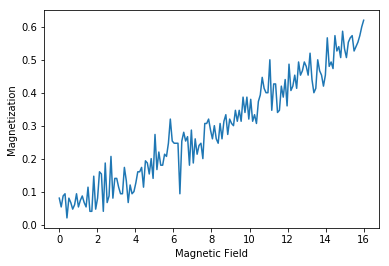

In [112]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [114]:
%%time

T = 0.1

h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if min(1.0, np.exp(-(flip_energy-cur_energy)/T)) > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

KeyboardInterrupt: 

In [137]:
T = 0.1

In [138]:
def partition_func(spin_configurations, interactions, temperature, b, h=0.0):
    z = 0.
    for sc in spin_configurations:
        energy = spin_hamiltonian(spins, interactions, b, h)
        z += np.exp(-energy/temperature)
    return z

In [139]:
def mean_magnetization(spin_configurations, interactions, temperature, b, h=0.0):
    z = partition_func(spin_configurations, interactions, temperature, b, h)
    mean_m = 0.
    for sc in spin_configurations:
        m = abs(sum(sc))/(len(sc)*0.5)
        print(m)
        energy = spin_hamiltonian(spins, interactions, b, h)
        mean_m += m * np.exp(-energy/temperature)
    return mean_m/z

In [133]:
N_SPIN_CONFIGURATIONS = 10000

In [134]:
spin_configurations = [np.random.randint(0, 2, N_SPIN) - 0.5 for _ in range(N_SPIN_CONFIGURATIONS)]

In [135]:
partition_func(spin_configurations, interactions, temperature=T, b=b, h=0.0)

1.1966345500603842e+186

In [140]:
mean_magnetization(spin_configurations, interactions, temperature=T, b=b, h=30.0)

0.16
0.12
0.02
0.02
0.06
0.02
0.1
0.1
0.16
0.06
0.06
0.08
0.14
0.16
0.04
0.02
0.14
0.08
0.18
0.12
0.04
0.0
0.14
0.04
0.02
0.06
0.08
0.2
0.06
0.06
0.22
0.08
0.16
0.18
0.08
0.06
0.08
0.06
0.0
0.14
0.18
0.06
0.0
0.0
0.18
0.08
0.04
0.08
0.1
0.06
0.0
0.14
0.1
0.08
0.12
0.12
0.14
0.04
0.08
0.1
0.02
0.06
0.02
0.1
0.06
0.0
0.02
0.02
0.14
0.18
0.02
0.14
0.04
0.1
0.26
0.06
0.02
0.04
0.1
0.1
0.14
0.14
0.0
0.04
0.0
0.02
0.04
0.06
0.1
0.02
0.04
0.06
0.12
0.04
0.24
0.1
0.12
0.02
0.02
0.16
0.14
0.04
0.12
0.08
0.06
0.1
0.08
0.06
0.02
0.0
0.04
0.02
0.0
0.04
0.14
0.14
0.14
0.04
0.08
0.0
0.12
0.0
0.08
0.0
0.04
0.02
0.04
0.16
0.2
0.04
0.08
0.16
0.02
0.04
0.04
0.0
0.2
0.06
0.1
0.08
0.12
0.1
0.12
0.06
0.04
0.0
0.12
0.02
0.0
0.1
0.06
0.02
0.0
0.02
0.1
0.02
0.08
0.08
0.02
0.02
0.18
0.02
0.06
0.06
0.18
0.14
0.0
0.1
0.1
0.14
0.08
0.04
0.1
0.06
0.08
0.02
0.1
0.04
0.1
0.16
0.04
0.06
0.14
0.02
0.04
0.12
0.04
0.1
0.0
0.12
0.08
0.06
0.02
0.24
0.14
0.12
0.12
0.08
0.08
0.14
0.16
0.04
0.06
0.14
0.08
0.0
0.08
0.18
0.04


0.02
0.0
0.04
0.14
0.14
0.02
0.08
0.3
0.02
0.22
0.02
0.02
0.16
0.1
0.12
0.08
0.06
0.0
0.1
0.18
0.02
0.08
0.12
0.0
0.04
0.04
0.04
0.02
0.1
0.08
0.08
0.12
0.0
0.12
0.1
0.02
0.04
0.0
0.0
0.06
0.12
0.14
0.02
0.12
0.0
0.02
0.0
0.0
0.2
0.08
0.04
0.04
0.12
0.14
0.12
0.0
0.18
0.16
0.14
0.04
0.04
0.02
0.1
0.0
0.0
0.06
0.06
0.06
0.04
0.08
0.12
0.12
0.1
0.1
0.02
0.06
0.06
0.0
0.26
0.12
0.02
0.04
0.08
0.04
0.02
0.16
0.2
0.14
0.14
0.12
0.2
0.06
0.14
0.02
0.02
0.08
0.14
0.06
0.14
0.18
0.16
0.16
0.04
0.08
0.24
0.04
0.04
0.06
0.2
0.0
0.04
0.08
0.14
0.1
0.14
0.08
0.12
0.06
0.06
0.1
0.08
0.02
0.0
0.18
0.14
0.14
0.16
0.08
0.08
0.08
0.06
0.06
0.1
0.12
0.04
0.08
0.04
0.2
0.2
0.08
0.0
0.06
0.0
0.02
0.06
0.1
0.02
0.06
0.08
0.14
0.0
0.0
0.06
0.12
0.02
0.1
0.06
0.06
0.08
0.02
0.08
0.12
0.12
0.16
0.06
0.12
0.06
0.08
0.1
0.14
0.08
0.12
0.04
0.04
0.02
0.02
0.12
0.14
0.1
0.0
0.08
0.04
0.0
0.16
0.02
0.04
0.02
0.1
0.06
0.08
0.02
0.06
0.08
0.02
0.08
0.08
0.0
0.1
0.08
0.12
0.1
0.08
0.08
0.06
0.08
0.02
0.06
0.22
0.1
0.

0.04
0.02
0.18
0.1
0.08
0.12
0.0
0.08
0.04
0.16
0.12
0.12
0.08
0.0
0.0
0.18
0.16
0.0
0.1
0.02
0.12
0.04
0.06
0.02
0.08
0.1
0.12
0.04
0.1
0.14
0.04
0.06
0.08
0.1
0.12
0.14
0.22
0.02
0.2
0.1
0.16
0.02
0.22
0.1
0.02
0.14
0.18
0.1
0.04
0.02
0.08
0.04
0.08
0.06
0.04
0.02
0.04
0.04
0.02
0.12
0.06
0.0
0.08
0.18
0.04
0.18
0.04
0.12
0.08
0.22
0.04
0.04
0.06
0.02
0.08
0.08
0.1
0.02
0.02
0.1
0.1
0.08
0.08
0.04
0.0
0.04
0.0
0.06
0.14
0.04
0.06
0.14
0.02
0.08
0.08
0.06
0.02
0.14
0.1
0.08
0.02
0.14
0.04
0.02
0.2
0.18
0.08
0.04
0.1
0.02
0.08
0.06
0.04
0.1
0.04
0.14
0.06
0.14
0.12
0.02
0.2
0.04
0.22
0.06
0.08
0.04
0.12
0.0
0.16
0.12
0.06
0.04
0.06
0.06
0.02
0.16
0.02
0.04
0.04
0.04
0.02
0.04
0.08
0.08
0.08
0.06
0.02
0.18
0.04
0.14
0.08
0.06
0.08
0.1
0.08
0.16
0.18
0.06
0.02
0.18
0.06
0.0
0.02
0.14
0.02
0.04
0.12
0.06
0.12
0.02
0.08
0.06
0.06
0.04
0.06
0.06
0.08
0.04
0.06
0.14
0.14
0.02
0.06
0.0
0.04
0.02
0.02
0.14
0.02
0.1
0.14
0.1
0.12
0.1
0.02
0.16
0.0
0.02
0.14
0.2
0.02
0.04
0.08
0.1
0.0
0.04
0.02


0.12
0.08
0.14
0.14
0.18
0.08
0.0
0.34
0.08
0.04
0.08
0.04
0.1
0.02
0.06
0.06
0.16
0.06
0.2
0.06
0.12
0.1
0.14
0.02
0.08
0.0
0.02
0.12
0.02
0.08
0.02
0.14
0.16
0.14
0.1
0.06
0.08
0.08
0.1
0.12
0.0
0.04
0.16
0.1
0.02
0.08
0.04
0.02
0.06
0.04
0.02
0.0
0.02
0.08
0.18
0.12
0.16
0.02
0.06
0.0
0.1
0.06
0.02
0.18
0.06
0.16
0.06
0.02
0.02
0.04
0.02
0.14
0.1
0.1
0.12
0.02
0.04
0.14
0.18
0.12
0.02
0.04
0.18
0.02
0.04
0.04
0.04
0.12
0.04
0.0
0.08
0.08
0.22
0.08
0.12
0.12
0.04
0.2
0.04
0.08
0.08
0.02
0.0
0.14
0.02
0.02
0.04
0.02
0.08
0.12
0.22
0.18
0.06
0.02
0.1
0.12
0.08
0.02
0.12
0.1
0.06
0.0
0.16
0.06
0.06
0.24
0.02
0.1
0.0
0.1
0.14
0.14
0.06
0.2
0.0
0.24
0.0
0.08
0.0
0.08
0.12
0.14
0.06
0.04
0.24
0.18
0.08
0.02
0.0
0.06
0.08
0.08
0.02
0.08
0.02
0.08
0.08
0.2
0.12
0.04
0.0
0.1
0.04
0.04
0.12
0.08
0.16
0.04
0.02
0.04
0.02
0.18
0.02
0.02
0.02
0.04
0.04
0.06
0.1
0.1
0.14
0.06
0.06
0.06
0.08
0.16
0.18
0.12
0.04
0.02
0.16
0.02
0.02
0.06
0.06
0.08
0.08
0.12
0.02
0.06
0.04
0.02
0.12
0.14
0.22
0.06
0.0

0.08
0.04
0.16
0.12
0.04
0.14
0.04
0.18
0.1
0.04
0.16
0.02
0.1
0.0
0.08
0.18
0.14
0.0
0.16
0.08
0.14
0.1
0.02
0.06
0.14
0.06
0.08
0.1
0.02
0.16
0.04
0.04
0.04
0.12
0.14
0.06
0.08
0.1
0.0
0.02
0.02
0.0
0.04
0.04
0.02
0.02
0.14
0.02
0.04
0.28
0.08
0.04
0.12
0.1
0.04
0.06
0.16
0.12
0.08
0.16
0.04
0.04
0.12
0.22
0.08
0.08
0.06
0.0
0.12
0.08
0.12
0.02
0.24
0.02
0.06
0.1
0.12
0.16
0.04
0.14
0.02
0.08
0.04
0.06
0.02
0.08
0.06
0.08
0.26
0.08
0.06
0.0
0.1
0.12
0.14
0.0
0.04
0.14
0.06
0.0
0.0
0.0
0.06
0.1
0.0
0.08
0.1
0.06
0.04
0.04
0.08
0.04
0.14
0.0
0.02
0.04
0.02
0.12
0.08
0.28
0.04
0.02
0.14
0.0
0.06
0.16
0.14
0.04
0.14
0.02
0.06
0.14
0.04
0.02
0.06
0.04
0.06
0.04
0.18
0.02
0.08
0.04
0.08
0.14
0.06
0.04
0.08
0.0
0.06
0.1
0.08
0.0
0.1
0.02
0.08
0.02
0.0
0.1
0.06
0.12
0.0
0.06
0.1
0.16
0.08
0.12
0.02
0.22
0.04
0.02
0.0
0.0
0.02
0.02
0.06
0.04
0.04
0.1
0.02
0.02
0.02
0.0
0.02
0.04
0.02
0.04
0.14
0.0
0.04
0.1
0.04
0.02
0.04
0.1
0.06
0.02
0.04
0.06
0.0
0.1
0.1
0.18
0.08
0.0
0.12
0.08
0.18
0.14
0.

0.02
0.04
0.04
0.02
0.04
0.08
0.18
0.04
0.02
0.0
0.1
0.04
0.1
0.14
0.08
0.1
0.06
0.18
0.12
0.12
0.08
0.04
0.16
0.04
0.12
0.06
0.06
0.14
0.06
0.04
0.06
0.04
0.04
0.26
0.02
0.06
0.06
0.12
0.16
0.04
0.08
0.18
0.02
0.02
0.06
0.2
0.2
0.04
0.04
0.12
0.06
0.16
0.02
0.04
0.1
0.02
0.02
0.02
0.02
0.02
0.0
0.12
0.1
0.02
0.1
0.12
0.14
0.08
0.14
0.14
0.18
0.06
0.18
0.0
0.18
0.2
0.04
0.08
0.14
0.22
0.12
0.08
0.06
0.08
0.16
0.0
0.04
0.12
0.1
0.1
0.02
0.1
0.14
0.16
0.08
0.14
0.0
0.04
0.06
0.08
0.02
0.06
0.06
0.04
0.1
0.02
0.06
0.12
0.04
0.04
0.02
0.1
0.04
0.02
0.06
0.02
0.02
0.02
0.04
0.1
0.0
0.06
0.04
0.14
0.24
0.02
0.04
0.08
0.04
0.1
0.04
0.0
0.02
0.1
0.02
0.1
0.02
0.18
0.04
0.1
0.0
0.02
0.02
0.12
0.0
0.02
0.16
0.04
0.16
0.0
0.1
0.12
0.16
0.12
0.04
0.22
0.02
0.04
0.16
0.0
0.12
0.08
0.18
0.04
0.14
0.04
0.0
0.08
0.16
0.06
0.04
0.12
0.08
0.2
0.08
0.0
0.16
0.0
0.18
0.04
0.04
0.04
0.04
0.12
0.12
0.16
0.06
0.04
0.08
0.16
0.1
0.16
0.12
0.1
0.12
0.02
0.16
0.18
0.1
0.02
0.14
0.08
0.28
0.04
0.22
0.14
0.02
0.1

0.08013000000000277